##### Finding Best Channel

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

##### reading images (DRIVE)

In [2]:
image_dir = "Data-Sets/DRIVE/Images"
mask_dir = "Data-Sets/DRIVE/Labels/"

image_paths = sorted(
    [
        os.path.join( image_dir, fname)
        for fname in os.listdir( image_dir)
        if fname.endswith( ".png")
    ]
)

mask_paths = sorted(
    [
        os.path.join( mask_dir, fname)
        for fname in os.listdir( mask_dir)
        if fname.endswith( ".png")
    ]
)

X = []
Y = []

for image in image_paths:
	X.append( np.array( Image.open( image)) / 255)

for mask in mask_paths:
	Y.append( np.array( Image.open( mask)) / 255)

X = np.array( X)
Y = np.array( Y)

print( f"Images shape: { X.shape}")
print( f"Masks shape: { Y.shape}")

Images shape: (20, 256, 256, 3)
Masks shape: (20, 256, 256)


##### Show each channel and mask of first sample

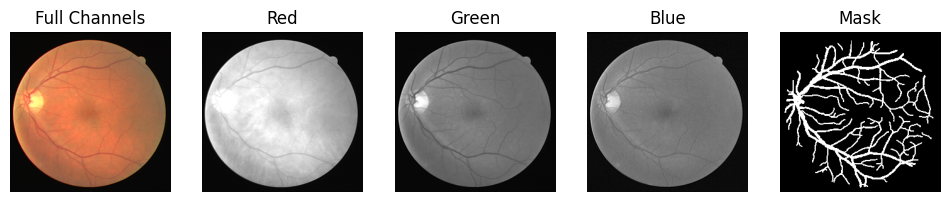

In [3]:
fig = plt.figure( figsize=( 12, 7))

fig.add_subplot( 1, 5, 1)
plt.imshow( X[ 0])
plt.title( "Full Channels")
plt.axis( "off")

fig.add_subplot( 1, 5, 2)
plt.imshow( X[ 0][:,:, 0], cmap="gray")
plt.title( "Red")
plt.axis( "off")

fig.add_subplot( 1, 5, 3)
plt.imshow( X[ 0][:,:, 1], cmap="gray")
plt.title( "Green")
plt.axis( "off")

fig.add_subplot( 1, 5, 4)
plt.imshow( X[ 0][:,:, 2], cmap="gray")
plt.title( "Blue")
plt.axis( "off")

fig.add_subplot( 1, 5, 5)
plt.imshow( Y[ 0], cmap="gray")
plt.title( "Mask")
plt.axis( "off")

plt.show()

##### Compute Correlation

In [4]:
correlations = []

print( "Correlation of Each Channel with Mask")

for i in range( len( X)):
	x = np.float32( X[ i])
	y = np.float32( Y[ i])

	corr_R = cv2.filter2D( y, kernel=x[:,:,0], ddepth=-1).max()
	corr_G = cv2.filter2D( y, kernel=x[:,:,1], ddepth=-1).max()
	corr_B = cv2.filter2D( y, kernel=x[:,:,2], ddepth=-1).max()

	print( f"#{ i + 1:02d} - R: { corr_R:.2f}, G: { corr_G:.2f}, B: { corr_B:.2f}")

	correlations.append( [ corr_R, corr_G, corr_B])

corr_mean = np.mean( correlations, axis=0)

print( f"Mean Correlation - R: { corr_mean[ 0]:.2f}, G: { corr_mean[ 1]:.2f}, B: { corr_mean[ 2]:.2f}")

Correlation of Each Channel with Mask
#01 - R: 7964.51, G: 4672.75, B: 3045.13
#02 - R: 10312.17, G: 4902.91, B: 2689.51
#03 - R: 8509.51, G: 4081.97, B: 2180.36
#04 - R: 13420.31, G: 6755.14, B: 3782.47
#05 - R: 8370.49, G: 4257.28, B: 2428.07
#06 - R: 5518.44, G: 2617.20, B: 1431.44
#07 - R: 10625.71, G: 5418.47, B: 3389.80
#08 - R: 8668.54, G: 5680.49, B: 3306.63
#09 - R: 7708.59, G: 3233.12, B: 2275.44
#10 - R: 5616.66, G: 2474.27, B: 1445.54
#11 - R: 7105.85, G: 3763.09, B: 2130.29
#12 - R: 8772.26, G: 5094.49, B: 2687.89
#13 - R: 8985.40, G: 5174.57, B: 3109.22
#14 - R: 9446.09, G: 5277.94, B: 2043.52
#15 - R: 8522.82, G: 3912.23, B: 2565.71
#16 - R: 7844.14, G: 4855.45, B: 3065.16
#17 - R: 6855.38, G: 4216.57, B: 2972.02
#18 - R: 7614.64, G: 5542.66, B: 3667.87
#19 - R: 7707.94, G: 4043.31, B: 2259.01
#20 - R: 5243.37, G: 2937.35, B: 1590.91
Mean Correlation - R: 8240.64, G: 4445.56, B: 2603.30
